In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
from scipy.optimize import curve_fit
from numpy import arange
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import Birch

In [4]:
# Read in and grayscale the image
image = mpimg.imread('test_images/solidYellowLeft.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 180
high_threshold = 240
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

mask = np.zeros_like(edges)   
ignore_mask_color = 255   

imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 2     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #minimum number of pixels making up a line
max_line_gap = 5    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

color_edges = np.dstack((edges, edges, edges)) 

lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)



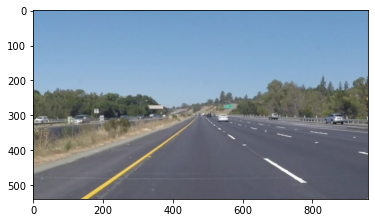

In [5]:
plt.imshow(image)

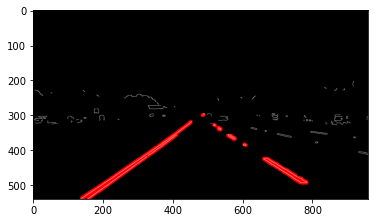

In [6]:
plt.imshow(lines_edges)

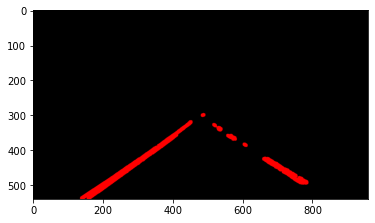

In [7]:
plt.imshow(line_image)

In [8]:
#curve fitting? or clustering?
points = []
x_points = []
y_points = []

/var/folders/jw/644649297gd0_6hzy4hf6yl00000gn/T/ipykernel_62942/1183820527.py:11: RuntimeWarning: invalid value encountered in multiply
  y = slope*(i-x2) + y2


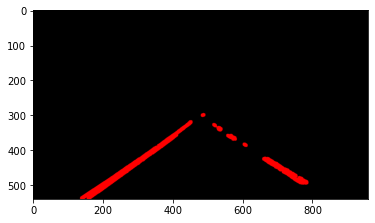

In [9]:
line_image = np.copy(image)*0 # creating a blank to draw lines on
for line in lines:
    for x1,y1,x2,y2 in line:
        startx = min(x1,x2)
        endx = max(x1,x2)
        if x2-x1 != 0:
            slope = (y2-y1)/(x2-x1)
        else:
            slope = math.inf
        for i in range(startx,endx+1):
            y = slope*(i-x2) + y2
            if y != math.inf and not math.isnan(y):
                points.append([i,y])
                x_points.append(i)
                y_points.append(y)
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
        
plt.imshow(line_image)
#print(points)

In [36]:
points

[[139, 537.0],
 [140, 536.3434343434343],
 [141, 535.6868686868687],
 [142, 535.030303030303],
 [143, 534.3737373737374],
 [144, 533.7171717171717],
 [145, 533.060606060606],
 [146, 532.4040404040404],
 [147, 531.7474747474747],
 [148, 531.0909090909091],
 [149, 530.4343434343434],
 [150, 529.7777777777778],
 [151, 529.1212121212121],
 [152, 528.4646464646464],
 [153, 527.8080808080808],
 [154, 527.1515151515151],
 [155, 526.4949494949495],
 [156, 525.8383838383838],
 [157, 525.1818181818181],
 [158, 524.5252525252525],
 [159, 523.8686868686868],
 [160, 523.2121212121212],
 [161, 522.5555555555555],
 [162, 521.8989898989898],
 [163, 521.2424242424242],
 [164, 520.5858585858585],
 [165, 519.929292929293],
 [166, 519.2727272727273],
 [167, 518.6161616161617],
 [168, 517.959595959596],
 [169, 517.3030303030303],
 [170, 516.6464646464647],
 [171, 515.989898989899],
 [172, 515.3333333333334],
 [173, 514.6767676767677],
 [174, 514.0202020202021],
 [175, 513.3636363636364],
 [176, 512.7070707

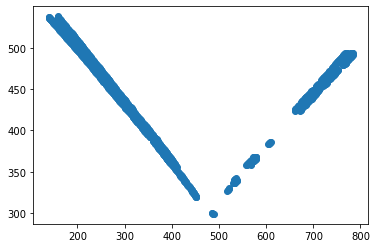

In [11]:
plt.scatter(x_points,y_points)

# Curve Fitting Using Scipy

In [12]:
def objective(x, a, b):
	return a * x + b

In [13]:
popt, _ = curve_fit(objective, x_points, y_points)

In [14]:
print(popt)

[-5.61594377e-02  4.57322780e+02]


In [15]:
a, b = popt

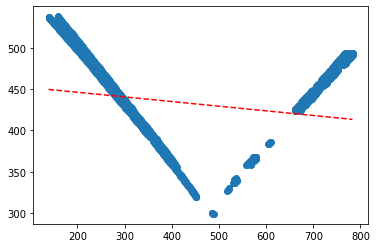

In [77]:
plt.scatter(x_points, y_points)
x_line = arange(min(x_points), max(x_points), 1)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')

In [81]:
def curve(obj,x,y):
    popt, _ = curve_fit(obj, x, y)
    a, b = popt
    #plt.scatter(x, y)
    x_line = arange(min(x), max(x), 1)
    y_line = objective(x_line, a, b)
    return(x_line,y_line)

# Birch Clustering

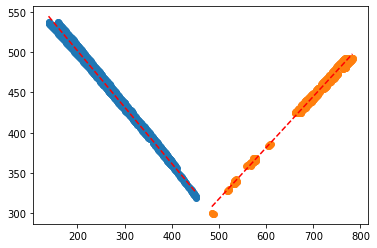

In [88]:
# define dataset
#X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = Birch(threshold=0.9, n_clusters=2)
# fit the model
model.fit(points)
# assign a cluster to each example
yhat = model.predict(points)
# retrieve unique clusters
clusters = unique(yhat)

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    row_ix = row_ix[0]
    new_x = []
    new_y = []
    for i in row_ix:
        new_x.append(points[i][0])
        new_y.append(points[i][1])
    plt.scatter(new_x,new_y)
    x_line,y_line = curve(objective, new_x,new_y)
    plt.plot(x_line, y_line, '--', color='red')

# show the plot
plt.show()